<a href="https://colab.research.google.com/github/AsSakina/Code_Projects/blob/main/Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Checkpoint Objective :     

Let's say you are a Machine Learning engineer working for a clothing company and you want to adopt new strategies  to improve the company profit .

Instructions :       

Use this dataset and the association rules mining to find new marketing plans .

Note here that one of the strategies can be based on which items should be put together

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Bonus: try to do some visualization before applying the Apriori algorithm.

Let's do the same checkpoint but with a bigger dataset !


In [ ]:
!pip install apyori


In [ ]:
#Importing Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [ ]:
merged = []
for i in dataset :
  for x in i:
    merged.append(x)
print(merged)

['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat', 'Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat', 'Dress', 'Sandals', 'Scarf', 'Pants', 'Heels', 'Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat', 'Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']


In [ ]:
data = pd.Series(merged).value_counts()
data

Skirt         4
Scarf         4
Pants         4
Hat           4
Sneakers      2
Dress         2
Heels         2
Earrings      2
Sunglasses    1
Sandals       1
Necklace      1
Shirt         1
dtype: int64

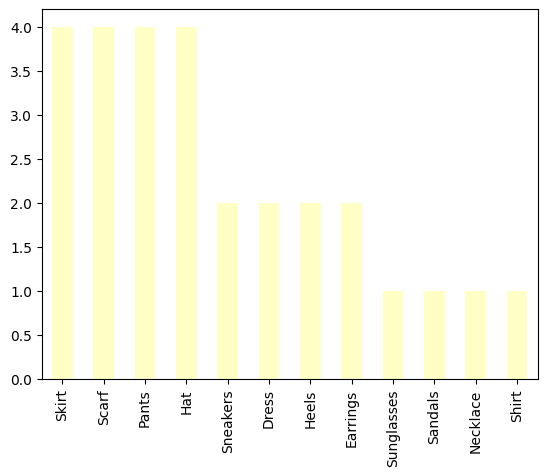

In [ ]:
plt.figure();

data.plot(kind="bar", color="#FFFEC4");

In [ ]:
data = pd.DataFrame(dataset)
data

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


In [ ]:
#Apriori Function
#in order to use apriori function, we need to transform our dataset into a one-hot-encoded Dataframe but it will be True/False instead of 0/1

te =TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
Apri = pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
Apri


,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [ ]:
#Let’s select itemsets with a minimum of 60% Support

apriori(Apri, min_support=0.4)
#Apriori returns by default the column indice of the item .

,support,itemsets
0,0.4,(0)
1,0.4,(1)
2,0.6,(2)
3,0.4,(3)
4,0.8,(5)
5,0.8,(7)
6,0.6,(9)
7,0.4,(10)
8,0.4,"(0, 3)"
9,0.4,"(0, 7)"


In [ ]:
#Support with column names

frequent_itemsets=apriori(Apri, min_support=0.4, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.8,(Pants)
5,0.8,(Scarf)
6,0.6,(Skirt)
7,0.4,(Sneakers)
8,0.4,"(Heels, Dress)"
9,0.4,"(Scarf, Dress)"


In [ ]:
#Confidence Code
#In case we want to extract rules based on other metrics like confidence, we can use association_rules from mlxtend.frequent_patterns library.

associate_items = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate items
associate_items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Heels),(Dress),0.4,0.4,0.4,1.00,2.500000,0.24,inf
1,(Dress),(Heels),0.4,0.4,0.4,1.00,2.500000,0.24,inf
2,(Dress),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
3,(Earrings),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
4,(Sneakers),(Hat),0.4,0.6,0.4,1.00,1.666667,0.16,inf
5,(Heels),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
6,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
7,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
8,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.250000,0.12,inf
9,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6


In [ ]:
#Lift code
#Associating based on Lift

association_rules(frequent_itemsets,metric="lift",min_threshold=1.5)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
1,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
2,(Sneakers),(Hat),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
3,(Hat),(Sneakers),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
4,(Sneakers),(Skirt),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
5,(Skirt),(Sneakers),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
6,"(Heels, Scarf)",(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
7,"(Scarf, Dress)",(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
8,(Heels),"(Scarf, Dress)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
9,(Dress),"(Heels, Scarf)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


#Second Part ⬇

In [ ]:
dataset_ = pd.read_csv('Market_Basket_Optimisation.csv')

In [ ]:
dataset_

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create a list of unique transaction IDs
transaction_ids = dataset_.columns.tolist()

# Remove the first column containing non-item data (if applicable)
transaction_ids = transaction_ids[1:]

# Initialize an empty DataFrame for the reshaped data
reshaped_data = pd.DataFrame(columns=['Transaction_ID', 'Item'])

# Iterate over each row of the original DataFrame
for index, row in dataset_.iterrows():
    transaction_id = row[0]  # Assuming the first column contains transaction IDs

    # Iterate over each item in the row and add it to the reshaped DataFrame
    for item in row[1:]:
        reshaped_data = reshaped_data.append({'Transaction_ID': transaction_id, 'Item': item}, ignore_index=True)

# Drop rows with missing values
reshaped_data = reshaped_data.dropna()


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
<ipython-input-15-c2bbb93f93d7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_data = reshaped_data.append({'Transaction_ID': transaction_id, 'Item': item}, ignore_index=True)
<ipython-input-15-c2bbb93f93d7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_data = reshaped_data.append({'Transaction_ID': transaction_id, 'Item': item}, ignore_index=True)
<ipython-input-15-c2bbb93f93d7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_data = reshaped_data.append({'Transaction_ID': transaction_id, 'Item': item}, ignore_index=True)
<ipython-input-15-c2bbb93f93d7>:16: FutureWarning: The frame.append method is deprecated an

In [ ]:
dataset_

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create an instance of TransactionEncoder
#te = TransactionEncoder()

# Apply one-hot encoding on the melted dataset
#te_ary = te.fit(dataset_).transform(dataset_)

# Create a new DataFrame from the encoded array
#Apri_1 = pd.DataFrame(te_ary, columns=te.columns_)

#Apri_1

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Create an instance of TransactionEncoder
te = TransactionEncoder()

# Apply one-hot encoding on the melted dataset
te_ary = te.fit(dataset_).transform(dataset_)

# Create a new DataFrame from the encoded array
Apri_1 = pd.DataFrame(te_ary, columns=range(te_ary.shape[1]))

# Now you can access the encoded DataFrame with sequential column names
print(Apri_1)



         0      1      2      3      4      5      6      7      8      9   \
0     False  False  False  False  False  False  False  False   True   True   
1     False   True  False  False   True  False  False  False  False  False   
2     False   True  False   True   True  False  False  False  False  False   
3      True   True   True  False  False   True  False   True  False   True   
4      True   True  False  False  False   True  False   True  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7495  False  False  False  False  False  False  False  False  False  False   
7496  False  False  False  False  False  False  False  False  False  False   
7497  False  False  False  False  False  False  False  False  False  False   
7498  False  False  False  False  False  False  False  False  False  False   
7499  False  False  False  False  False  False  False  False  False  False   

      ...     16     17     18     19     20     21     22     

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Reset the index of the DataFrame
dataset_.reset_index(drop=True, inplace=True)

# Create a list of lists containing the items in each transaction
transactions = dataset_.apply(lambda row: [item for item in row if pd.notnull(item)], axis=1).tolist()

# Create an instance of TransactionEncoder and fit-transform the transactions
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)

# Create a new DataFrame from the encoded array with item names as column names
Apri_1 = pd.DataFrame(te_ary, columns=te.columns_)

# Now you can access the encoded DataFrame with item names as columns
Apri_1



,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Let’s select itemsets with a minimum of 60% Support

apriori(Apri_1, min_support=0.003)
#Apriori returns by default the column indice of the item .For example (3) means Eggs.

,support,itemsets
0,0.020267,(1)
1,0.008800,(2)
2,0.004667,(3)
3,0.033200,(4)
4,0.004533,(5)
...,...,...
1437,0.003067,"(72, 82, 100, 55)"
1438,0.003067,"(72, 108, 100, 55)"
1439,0.003333,"(72, 81, 100, 71)"
1440,0.003067,"(72, 97, 100, 71)"


In [ ]:
#Support with column names

frequent_itemsets=apriori(Apri_1, min_support=0.00023, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.020267,(almonds)
1,0.008800,(antioxydant juice)
2,0.004667,(asparagus)
3,0.033200,(avocado)
4,0.004533,(babies food)
...,...,...
90211,0.000400,"(spaghetti, milk, tomatoes, parmesan cheese, m..."
90212,0.000267,"(spaghetti, milk, tomatoes, parmesan cheese, t..."
90213,0.000267,"(spaghetti, tomatoes, parmesan cheese, mineral..."
90214,0.000267,"(spaghetti, milk, tomatoes, parmesan cheese, m..."


In [ ]:
dataset_.shape

(7500, 20)

In [ ]:
#Confidence Code
#In case we want to extract rules based on other metrics like confidence, we can use association_rules from mlxtend.frequent_patterns library.

associate_items = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.00003) # associate items
associate_items



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(almonds),0.033200,0.020267,0.001600,0.048193,2.377933,0.000927,1.029340
1,(almonds),(avocado),0.020267,0.033200,0.001600,0.078947,2.377933,0.000927,1.049669
2,(bacon),(almonds),0.008667,0.020267,0.000267,0.030769,1.518219,0.000091,1.010836
3,(almonds),(bacon),0.020267,0.008667,0.000267,0.013158,1.518219,0.000091,1.004551
4,(barbecue sauce),(almonds),0.010800,0.020267,0.000533,0.049383,2.436647,0.000314,1.030629
...,...,...,...,...,...,...,...,...,...
1673885,(turkey),"(spaghetti, milk, tomatoes, parmesan cheese, m...",0.062533,0.000267,0.000267,0.004264,15.991471,0.000250,1.004015
1673886,(nonfat milk),"(spaghetti, milk, tomatoes, parmesan cheese, m...",0.010400,0.000400,0.000267,0.025641,64.102564,0.000263,1.025905
1673887,(frozen vegetables),"(spaghetti, milk, tomatoes, parmesan cheese, m...",0.095333,0.000267,0.000267,0.002797,10.489510,0.000241,1.002538
1673888,(whole wheat rice),"(spaghetti, milk, tomatoes, parmesan cheese, m...",0.058533,0.000267,0.000267,0.004556,17.084282,0.000251,1.004309


In [ ]:
#Lift code
#Associating based on Lift

association_rules(frequent_itemsets,metric="lift",min_threshold=0.0005)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(almonds),0.033200,0.020267,0.001600,0.048193,2.377933,0.000927,1.029340
1,(almonds),(avocado),0.020267,0.033200,0.001600,0.078947,2.377933,0.000927,1.049669
2,(bacon),(almonds),0.008667,0.020267,0.000267,0.030769,1.518219,0.000091,1.010836
3,(almonds),(bacon),0.020267,0.008667,0.000267,0.013158,1.518219,0.000091,1.004551
4,(barbecue sauce),(almonds),0.010800,0.020267,0.000533,0.049383,2.436647,0.000314,1.030629
...,...,...,...,...,...,...,...,...,...
1673885,(turkey),"(spaghetti, milk, tomatoes, parmesan cheese, m...",0.062533,0.000267,0.000267,0.004264,15.991471,0.000250,1.004015
1673886,(nonfat milk),"(spaghetti, milk, tomatoes, parmesan cheese, m...",0.010400,0.000400,0.000267,0.025641,64.102564,0.000263,1.025905
1673887,(frozen vegetables),"(spaghetti, milk, tomatoes, parmesan cheese, m...",0.095333,0.000267,0.000267,0.002797,10.489510,0.000241,1.002538
1673888,(whole wheat rice),"(spaghetti, milk, tomatoes, parmesan cheese, m...",0.058533,0.000267,0.000267,0.004556,17.084282,0.000251,1.004309


In [ ]:
from apyori import apriori

In [ ]:
dt = []
for i in range(0, 7500):
  dt.append([str(dataset_.values[i, j])for j in range(0, 20)])

In [ ]:
association_rules = apriori(dt, min_support=0.003, min_confidence=0.15, min_lift=3, min_length=2)
association_results = list(association_rules) #convert rules by list

In [ ]:
print(len(association_results))

180


In [ ]:
print(association_results[100])


RelationRecord(items=frozenset({'nan', 'red wine', 'eggs', 'spaghetti'}), support=0.0037333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'red wine', 'eggs'}), items_add=frozenset({'nan', 'spaghetti'}), confidence=0.5283018867924528, lift=3.0338929180271026), OrderedStatistic(items_base=frozenset({'nan', 'red wine', 'eggs'}), items_add=frozenset({'spaghetti'}), confidence=0.5283018867924528, lift=3.0338929180271026)])
